#  TASK 1
## Boston Dataset Features
- `CRIM`: Per capita crime rate by town
- `ZN`: Proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: Proportion of non-retail business acres per town
- `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`: Nitric oxides concentration (parts per 10 million)
- `RM`: Average number of rooms per dwelling
- `AGE`: Proportion of owner-occupied units built prior to 1940
- `DIS`: Weighted distances to five Boston employment centres
- `RAD`: Index of accessibility to radial highways
- `TAX`: Full-value property-tax rate per $10,000
- `PTRATIO`: Pupil-teacher ratio by town
- ~~`B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town~~
- `LSTAT`: Percentage of lower status of the population
- `MEDV`: Median value of owner-occupied homes in $1000's


In [2]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)

boston_df = None

with open("housing.csv", "r") as f:
    names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
                         "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
    boston_df = pd.read_csv(f, header=None, index_col=False, names=names, sep=r'\s+') # Space separated csv

boston_df = boston_df.drop(["B"], axis=1) # Remove unethical data
#Check missing data
# does not run on alex's machine
#print(boston_df[boston_df.eq('?').any(1)])

In [3]:
boston_df.describe()
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


## Wine Dataset

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
wine_X = wine.data.features
wine_y = wine.data.targets
#does not run on alex's machine 
#print(wine_X[wine_X.eq('?').any(1)])
#print(wine_y[wine_y.eq('?').any(1)])

In [5]:
wine_data = wine_X.join(wine_y)
wine_data.describe()
wine_data.corr()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [6]:
wine_X = wine_X.to_numpy()
wine_y = wine_y.to_numpy()

# TASK 2
Linear Regression and Logistic Regression models are found in the accompanying .py files


# TASK 3
## Training Boston Dataset

First, we divide the dataset into training and test sets

In [7]:
from sklearn.model_selection import train_test_split
boston_np = boston_df.to_numpy()
boston_X = boston_np[:, :-1]
boston_y = boston_np[:, -1]
#changed shuffle to randomstate 42 for consistency
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, random_state=42)

We then initialize and train linear regression models

In [8]:
from linear_regression import LinearRegression
from linear_regression_sgd import LinearRegressionSGD

linear_reg_model = LinearRegression(boston_X.shape[1])
linear_sgd_model = LinearRegressionSGD(boston_X.shape[1])
linear_reg_model.fit(X_train, y_train)
linear_sgd_model.fit(X_train, y_train)
analytical_mse = linear_reg_model.compute_error(X_test, y_test)
analytical_train_mse = linear_reg_model.compute_error(X_train, y_train)
sgd_mse = linear_sgd_model.compute_error(X_test, y_test)
sgd_training_mse = linear_sgd_model.compute_error(X_train, y_train)
analytical_mse
analytical_train_mse
sgd_mse
sgd_training_mse



11.388854281933043

11.30214323970871

11.556972877569397

11.32903991861774

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Boston Dataset Error with SGD')

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

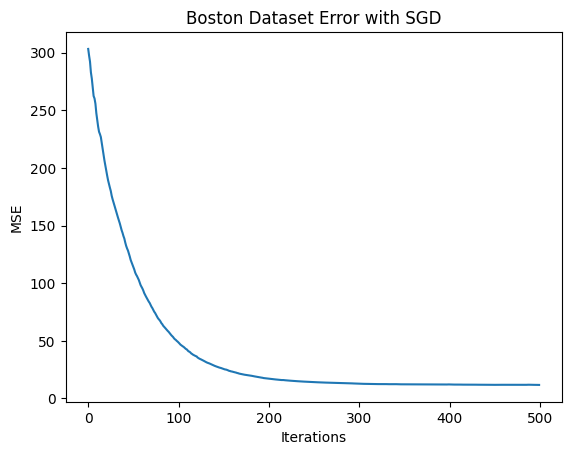

In [9]:
import matplotlib.pyplot as plt 

plt.figure()
plt.plot(linear_sgd_model.error_array[:500])
plt.title("Boston Dataset Error with SGD")
plt.xlabel("Iterations")
plt.ylabel("MSE")

In [10]:
analytical_y_hat = linear_reg_model.predict(X_test)
sgd_y_hat = linear_sgd_model.predict(X_test)
diff = sgd_y_hat.reshape((sgd_y_hat.size, 1)) - y_test.reshape((analytical_y_hat.size, 1))
y_test_comp = np.column_stack((y_test, analytical_y_hat, sgd_y_hat))
test_y_df = pd.DataFrame(y_test_comp, columns=["True y", "Analytical y_hat", "SGD y hat"])
test_y_df

,True y,Analytical y_hat,SGD y hat
0,23.6,28.958215,28.887719
1,32.4,36.287541,36.037181
2,13.6,14.098836,13.798430
3,22.8,25.033144,24.766570
4,16.1,17.601968,17.532329
5,20.0,23.294368,23.129247
6,17.8,17.414978,17.224668
7,14.0,13.688916,13.432334
8,19.6,22.037299,21.904213
9,16.8,20.300903,20.140031


## Training Wine Dataset With Logistic Regression

Again, we start by separating the data into 80/20 train-test sets

In [11]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

In [12]:
from logistic_regression import LogisticRegression
from logistic_regression_sgd import LogisticRegressionSGD

logistic_reg_model = LogisticRegression(wine_X.shape[1], 3)
logistic_sgd_model = LogisticRegressionSGD(wine_X.shape[1], 3)

logistic_reg_model.fit(wine_X_train, wine_y_train)
logistic_sgd_model.fit(wine_X_train, wine_y_train)

logistic_reg_f1 = logistic_reg_model.compute_F1(wine_X_test, wine_y_test)
logistic_reg_f1_train = logistic_reg_model.compute_F1(wine_X_train, wine_y_train)
logistic_sgd_f1 = logistic_sgd_model.compute_F1(wine_X_test, wine_y_test)
logistic_sgd_f1_train = logistic_sgd_model.compute_F1(wine_X_train, wine_y_train)

logistic_reg_f1
logistic_reg_f1_train
logistic_sgd_f1
logistic_sgd_f1_train


array([[0.96296296],
       [0.96551724],
       [0.99999999]])

array([[0.93333333],
       [0.92982456],
       [0.97499999]])

array([[0.99999999],
       [0.99999999],
       [0.99999999]])

array([[0.99999999],
       [0.99115044],
       [0.98765432]])

In [72]:
wine_y_hat_reg = logistic_reg_model.predict(wine_X_test)
wine_y_hat_sgd = logistic_sgd_model.predict(wine_X_test)
y_test_comp = np.column_stack((wine_y_test, wine_y_hat_reg, wine_y_hat_sgd))
test_y_df = pd.DataFrame(y_test_comp, columns=["True y", "GD y_hat", "SGD y hat"])
test_y_df

,True y,GD y_hat,SGD y hat
0,1,1,1
1,1,1,1
2,3,3,3
3,1,1,1
4,2,2,2
5,1,1,1
6,2,2,2
7,3,3,3
8,2,2,2
9,3,3,3


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'F1 scores with vanilla GD')

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'F1 score')

(0.0, 1.0)

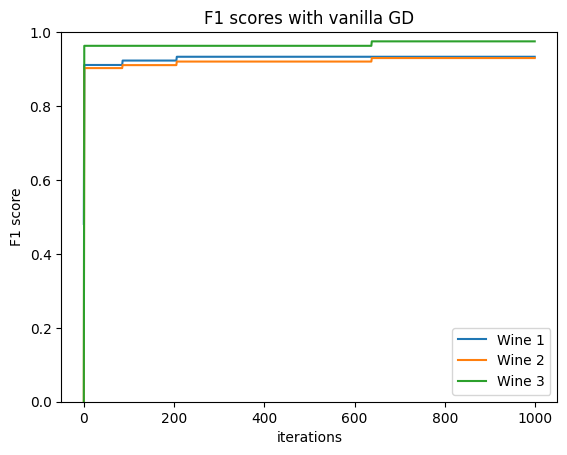

In [13]:

plt.figure()
for i in range(3):
    plt.plot(logistic_reg_model.f1_list[i, :], label=f"Wine {i+1}")
plt.legend()
plt.title("F1 scores with vanilla GD")
plt.xlabel("iterations")
plt.ylabel("F1 score")
plt.ylim((0, 1))

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'F1 scores with SGD')

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'F1 score')

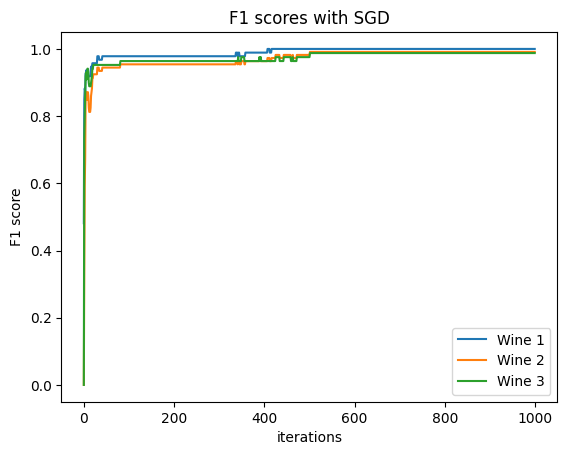

In [14]:
plt.figure()
#plt.ylim((0, 1))
for i in range(3):
    plt.plot(logistic_sgd_model.f1_list[i, :], label=f"Wine {i+1}")
plt.legend()
plt.title("F1 scores with SGD")
plt.xlabel("iterations")
plt.ylabel("F1 score")

## Five-Fold Cross Validation
We start by first dividing each of our datasets into 5 parts as evenly as we can

In [15]:
boston_indices = np.arange(boston_y.size)
wine_indices = np.arange(wine_y.size)

# Shuffle data
np.random.shuffle(boston_indices)
np.random.shuffle(wine_indices)
b1, b2, b3, b4, b5 = np.array_split(boston_indices, 5)
w1, w2, w3, w4, w5 = np.array_split(wine_indices, 5)
boston_list = [b1, b2, b3, b4, b5]
wine_list = [w1, w2, w3, w4, w5]

We first do 5-fold cross validation with analytical linear regression

In [16]:
for i in range(len(boston_list)):
    test_indices = boston_list[i]
    X_test = boston_X[test_indices, :]
    y_test = boston_y[test_indices]
    X_train = np.delete(boston_X, test_indices, axis=0)
    y_train = np.delete(boston_y, test_indices)
    linear_reg_model.fit(X_train, y_train)
    linear_reg_model.compute_error(X_test, y_test)
    

7.852321169579916

15.160986225686536

11.564816875075822

10.44726681562428

16.126066509405494

We then move to linear regression with SGD

In [17]:
for i in range(len(boston_list)):
    test_indices = boston_list[i]
    X_test = boston_X[test_indices, :]
    y_test = boston_y[test_indices]
    X_train = np.delete(boston_X, test_indices, axis=0)
    y_train = np.delete(boston_y, test_indices)
    linear_sgd_model.fit(X_train, y_train, batch_size=5, learning_rate=0.01, epsilon=1e-3, max_iters=1e3)
    linear_sgd_model.compute_error(X_test, y_test)

8.540291346237433

15.561610662044659

12.075157184031049

11.28516415708424

16.51071046734497

Next, we will do the same with the Wine data set, first with regular gradient descent

In [18]:
for i in range(len(wine_list)):
    test_indices = wine_list[i]
    X_test = wine_X[test_indices, :]
    y_test = wine_y[test_indices]
    X_train = np.delete(wine_X, test_indices, axis=0)
    y_train = np.delete(wine_y, test_indices)
    logistic_reg_model.fit(X_train, y_train)
    logistic_reg_model.compute_F1(X_test, y_test)

array([[0.95652173],
       [0.96969696],
       [0.99999999]])

array([[0.95999999],
       [0.96296296],
       [0.99999999]])

array([[0.9090909 ],
       [0.88235294],
       [0.87499999]])

array([[0.85714285],
       [0.89655172],
       [0.99999999]])

array([[0.96296296],
       [0.94736842],
       [0.99999999]])

Finally, we repeat this for Logistic Regression with SGD

In [19]:
for i in range(len(wine_list)):
    test_indices = wine_list[i]
    X_test = wine_X[test_indices, :]
    y_test = wine_y[test_indices]
    X_train = np.delete(wine_X, test_indices, axis=0)
    y_train = np.delete(wine_y, test_indices)
    logistic_sgd_model.fit(X_train, y_train)
    logistic_sgd_model.compute_F1(X_test, y_test)

array([[0.99999999],
       [0.96774193],
       [0.94117646]])

array([[0.99999999],
       [0.99999999],
       [0.99999999]])

array([[0.99999999],
       [0.97142857],
       [0.94117646]])

array([[0.99999999],
       [0.99999999],
       [0.99999999]])

array([[0.96296296],
       [0.94736842],
       [0.99999999]])

## Sampling with Different Training Data Sizes
We first start with the Boston set with anaytical linear regression

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'MSE')

Text(0.5, 0, 'Training Size')

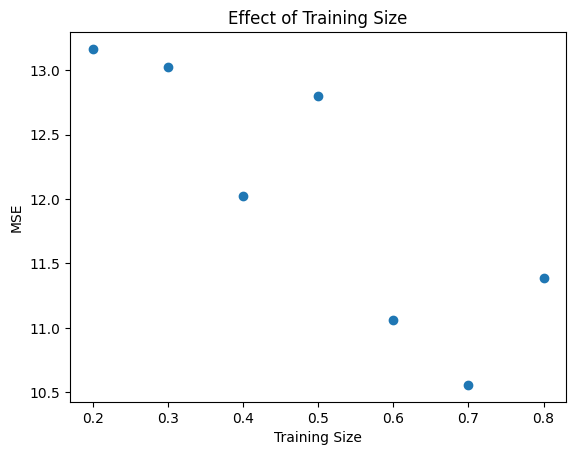

In [20]:
training_sizes = np.arange(0.2, 0.9, 0.1)
mse_list = np.empty(0, )
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, train_size=training_sizes[i], random_state=42)
    linear_reg_model.fit(X_train, y_train)
    mse = linear_reg_model.compute_error(X_test, y_test)
    mse_list = np.append(mse_list, mse)
plt.scatter(training_sizes, mse_list)
plt.title("Effect of Training Size")
plt.ylabel("MSE")
plt.xlabel("Training Size")

We repeat this for linear regression with SGD

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'MSE')

Text(0.5, 0, 'Training Size')

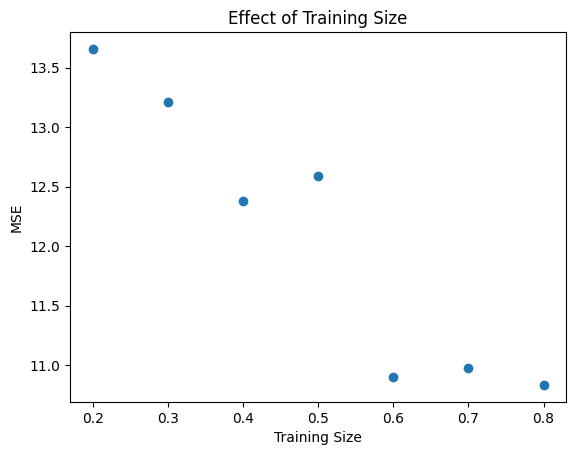

In [21]:
training_sizes = np.arange(0.2, 0.9, 0.1)
mse_list = np.empty(0, )
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, train_size=training_sizes[i], random_state=42)
    linear_sgd_model.fit(X_train, y_train)
    mse = linear_sgd_model.compute_error(X_test, y_test)
    mse_list = np.append(mse_list, mse)
plt.scatter(training_sizes, mse_list)
plt.title("Effect of Training Size")
plt.ylabel("MSE")
plt.xlabel("Training Size")

We now analyze this relation with the Wine dataset and vanilla GD

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'F1 Score')

Text(0.5, 0, 'Training Size')

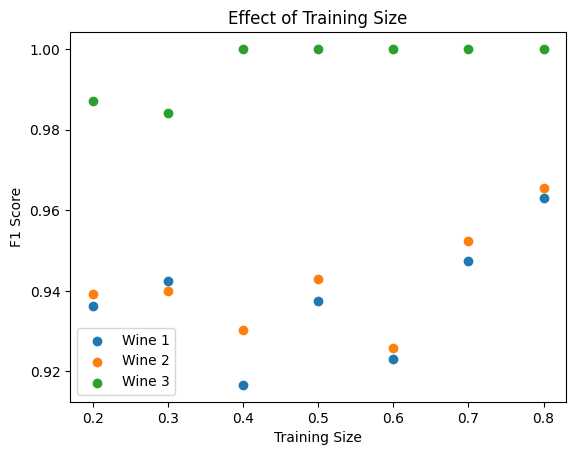

In [22]:
training_sizes = np.arange(0.2, 0.9, 0.1)
f1_list = np.empty((3, 0))
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, train_size=training_sizes[i], random_state=42)
    logistic_reg_model.fit(X_train, y_train)
    f1 = logistic_reg_model.compute_F1(X_test, y_test)
    f1_list = np.column_stack((f1_list, f1))
plt.figure()
plt.scatter(training_sizes, f1_list[0, :], label="Wine 1")
plt.scatter(training_sizes, f1_list[1, :], label="Wine 2")
plt.scatter(training_sizes, f1_list[2, :], label="Wine 3")
plt.title("Effect of Training Size")
plt.ylabel("F1 Score")
plt.xlabel("Training Size")
plt.legend()

Finally, we experiment with the same for logistic regression with SGD

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'F1 Score')

Text(0.5, 0, 'Training Size')

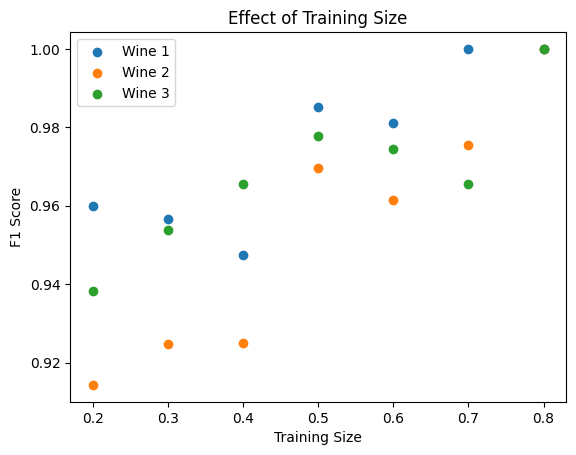

In [23]:
training_sizes = np.arange(0.2, 0.9, 0.1)
f1_list = np.empty((3, 0))
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, train_size=training_sizes[i], random_state=42)
    logistic_sgd_model.fit(X_train, y_train)
    f1 = logistic_sgd_model.compute_F1(X_test, y_test)
    f1_list = np.column_stack((f1_list, f1))
plt.figure()
plt.scatter(training_sizes, f1_list[0, :], label="Wine 1")
plt.scatter(training_sizes, f1_list[1, :], label="Wine 2")
plt.scatter(training_sizes, f1_list[2, :], label="Wine 3")
plt.title("Effect of Training Size")
plt.ylabel("F1 Score")
plt.xlabel("Training Size")
plt.legend()

## Effect of Batch Sizes
We want to investigate the effect of growing batch sizes on mini-batch SGD. We start first with the Boston dataset

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

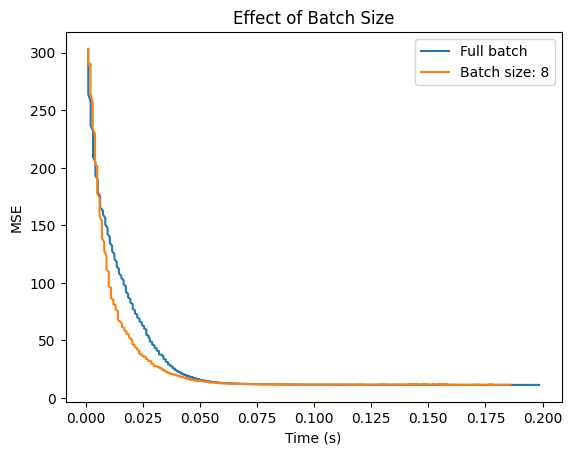

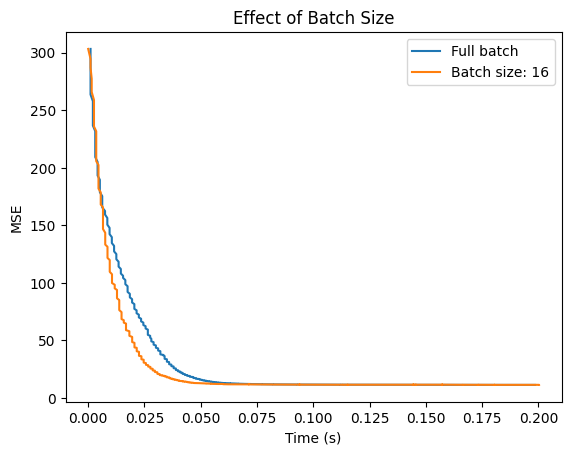

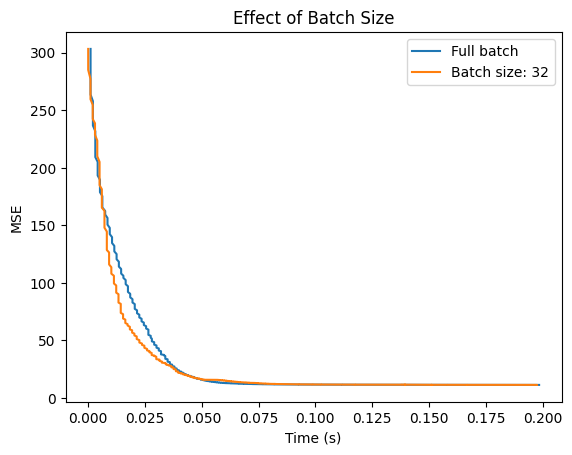

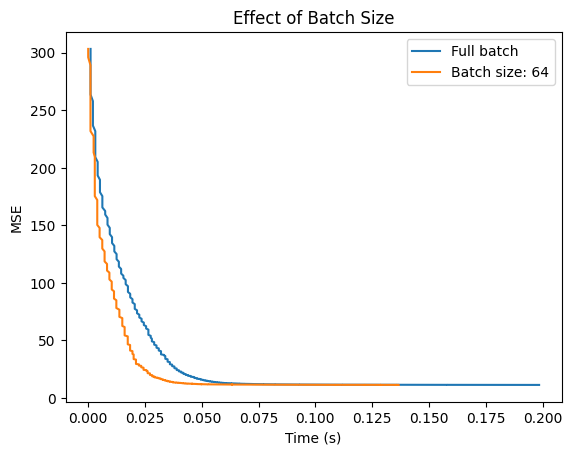

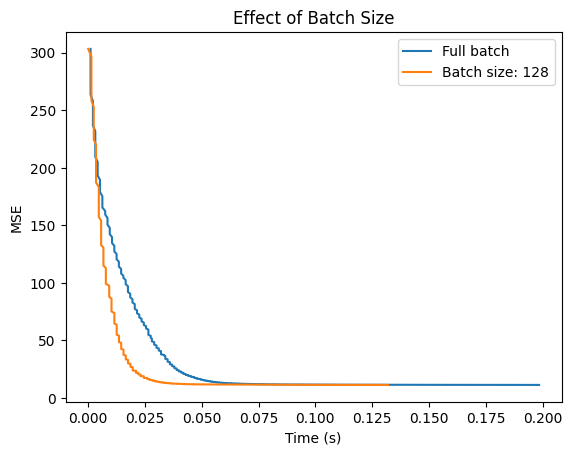

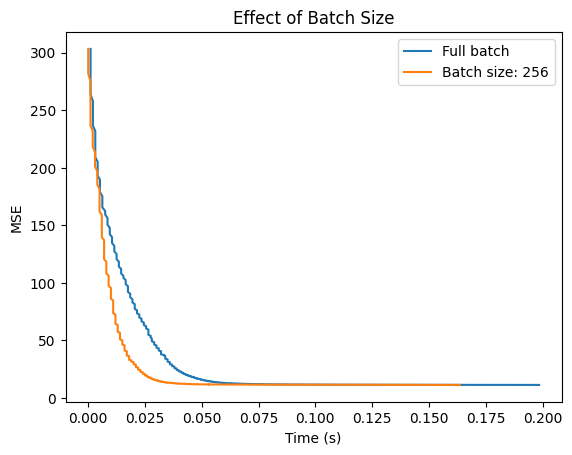

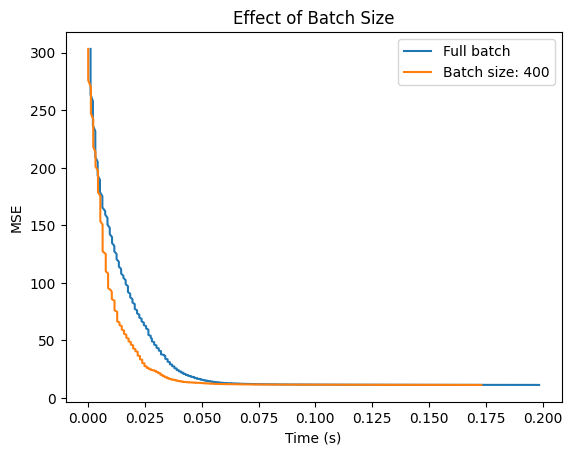

In [71]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, random_state=42)
linear_sgd_model.fit(X_train, y_train, batch_size=y_train.size)
base_case = linear_sgd_model.error_array
base_time = linear_sgd_model.time_array
test_batch_sizes = [8, 16, 32, 64, 128, 256, 400]
result_dict = {"Full batch":linear_sgd_model.compute_error(X_test, y_test)}
for size in test_batch_sizes:
    plt.figure()
    linear_sgd_model.fit(X_train, y_train, batch_size=size)
    error_array = linear_sgd_model.error_array
    time_array = linear_sgd_model.time_array
    result_dict[f"Size {size}"] = linear_sgd_model.compute_error(X_test, y_test)
    plt.plot(base_time[:1000], base_case[:1000], label="Full batch")
    plt.plot(time_array[:1000], error_array[:1000], label=f"Batch size: {size}")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("MSE")
    plt.title("Effect of Batch Size")

In [25]:

result_dict

{'Full batch': 11.389801451226651,
 'Size 8': 11.609628914538424,
 'Size 16': 11.660991909483437,
 'Size 32': 11.566295322610113,
 'Size 64': 11.381324543922503,
 'Size 128': 11.454578831143882,
 'Size 256': 11.345040076336012,
 'Size 400': 11.390350544939523}

We investigate the same with the Wine dataset

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

<Figure size 640x480 with 0 Axes>

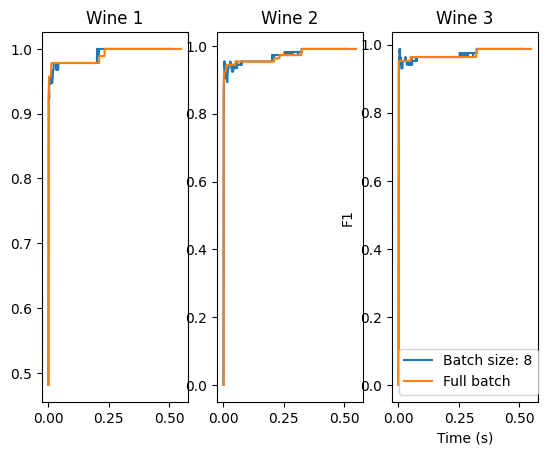

<Figure size 640x480 with 0 Axes>

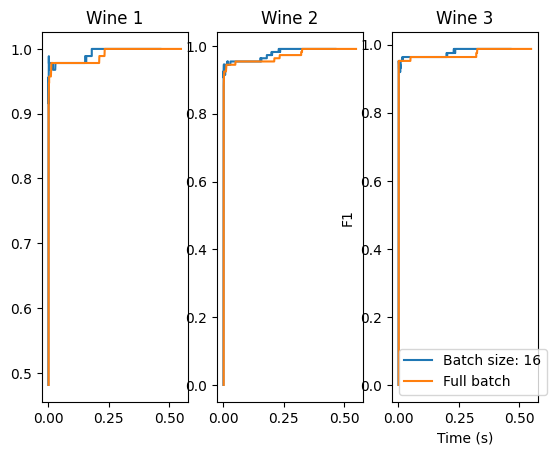

<Figure size 640x480 with 0 Axes>

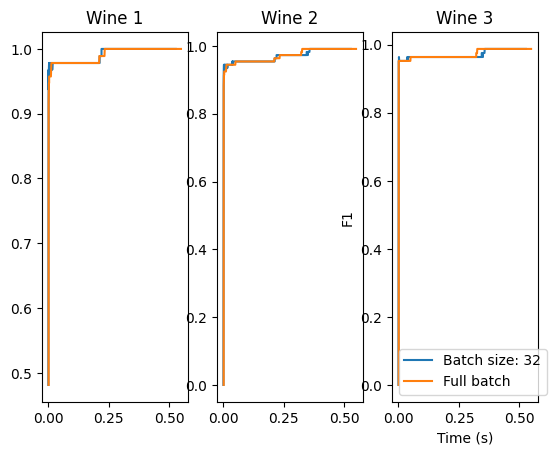

<Figure size 640x480 with 0 Axes>

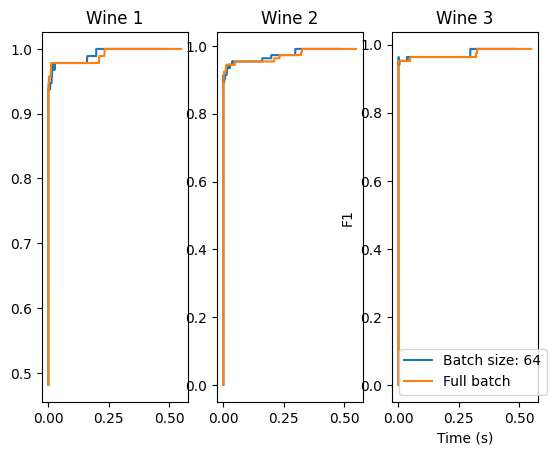

<Figure size 640x480 with 0 Axes>

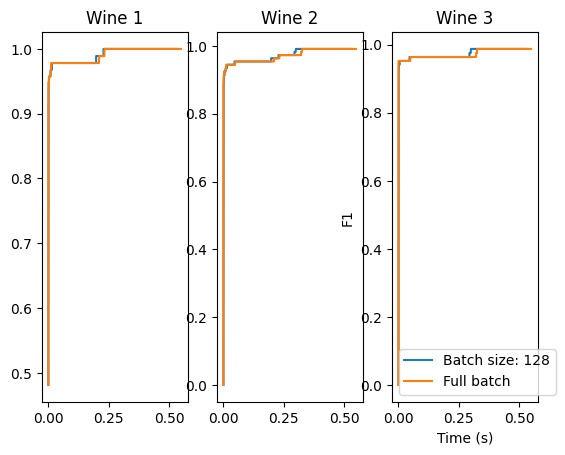

In [32]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)
logistic_sgd_model.fit(X_train, y_train, batch_size=y_train.size)
base_F1 = logistic_sgd_model.f1_list
base_time = logistic_sgd_model.time_list
test_batch_sizes = [8, 16, 32, 64, 128]
result_dict = {}
for size in test_batch_sizes:
    plt.figure()
    fig, axes = plt.subplots(1, 3)
    logistic_sgd_model.fit(X_train, y_train, batch_size=size)
    F1_array = logistic_sgd_model.f1_list
    time_array = logistic_sgd_model.time_list
    result_dict[f"Size {size}"] = logistic_sgd_model.compute_F1(X_test, y_test)
    axes[0].plot(time_array, F1_array[0, :], label=f"Batch size: {size}")
    axes[0].plot(base_time, base_F1[0, :], label="Full batch")
    axes[0].set_title("Wine 1")
    axes[1].plot(time_array, F1_array[1, :], label=f"Batch size: {size}")
    axes[1].plot(base_time, base_F1[1, :], label="Full batch")
    axes[1].set_title("Wine 2")
    axes[2].plot(time_array, F1_array[2, :], label=f"Batch size: {size}")
    axes[2].plot(base_time, base_F1[2, :], label="Full batch")
    axes[2].set_title("Wine 3")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("F1")

## Effect of Different Learning Rates
We first investigate the Boston dataset with learning rates of 1e-3, 1e-2, and 1e-1.

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Learning Rate')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Learning Rate')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Learning Rate')

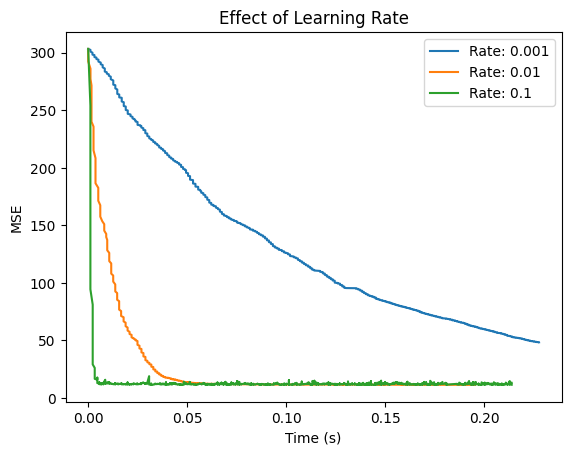

In [75]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, random_state=42)
test_learning_rates = [1e-3, 1e-2, 1e-1]
plt.figure()
for rate in test_learning_rates:
    linear_sgd_model.fit(X_train, y_train, learning_rate=rate)
    error_array = linear_sgd_model.error_array
    time_array = linear_sgd_model.time_array
    result_dict[f"Rate {rate}"] = linear_sgd_model.compute_error(X_test, y_test)
    plt.plot(time_array[:1000], error_array[:1000], label=f"Rate: {rate}")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("MSE")
    plt.title("Effect of Learning Rate")

We then repeat this with the wine dataset

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Wine 1')

Text(0.5, 1.0, 'Wine 2')

Text(0.5, 1.0, 'Wine 3')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'F1')

<Figure size 640x480 with 0 Axes>

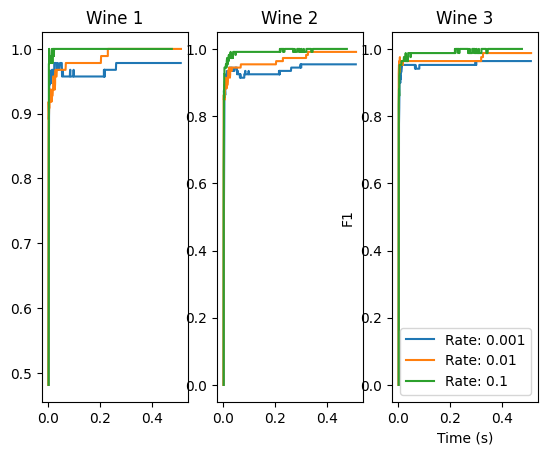

In [77]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)
test_learning_rates = [1e-3, 1e-2, 1e-1]
result_dict = {}
plt.figure()
fig, axes = plt.subplots(1, 3)
for rate in test_learning_rates:
    logistic_sgd_model.fit(X_train, y_train, learning_rate=rate)
    F1_array = logistic_sgd_model.f1_list
    time_array = logistic_sgd_model.time_list
    result_dict[f"Size {size}"] = logistic_sgd_model.compute_F1(X_test, y_test)
    axes[0].plot(time_array, F1_array[0, :], label=f"Rate: {rate}")
    axes[0].set_title("Wine 1")
    axes[1].plot(time_array, F1_array[1, :], label=f"Rate: {rate}")
    axes[1].set_title("Wine 2")
    axes[2].plot(time_array, F1_array[2, :], label=f"Rate: {rate}")
    axes[2].set_title("Wine 3")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("F1")

## Dimensionality Reduction
In the Boston dataset, we can see that some of the features have a fairly high correlation. In particular, TAX and RAD have a correlation of 0.91, NOX and INDUS 0.76. We will attempt to perform analytical linear regression with these features removed and compare the accuracy to the base case. At best, we might see that the results generalize better. However, if we are able to get comparable results, we can still consider it useful as that means less computations, particularly as datasets get larger.

In [69]:
# We will drop RAD(column 8) and NOX(column 4)
train_X, test_X, train_y, test_y = train_test_split(boston_X, boston_y, test_size=0.2, random_state=42)
linear_model_full = LinearRegression(train_X.shape[1])
linear_model_full.fit(train_X, train_y)

train_X_reduced = np.delete(train_X, [4, 8], axis=1)
test_X_reduced = np.delete(test_X, [4, 8], axis=1)
linear_model_reduced = LinearRegression(train_X_reduced.shape[1])
linear_model_reduced.fit(train_X_reduced, train_y)

linear_model_full.compute_error(test_X, test_y)
linear_model_reduced.compute_error(test_X_reduced, test_y)

11.388854281933043

12.729044814513646

Given the above we see that removing these features only reduce precision hence must contain valuable information

## Effects of gaussian basis features on the boston dataset

In [ ]:
def calculate_gaussian_basis_functions(X, centers, s):
        num_samples = X.shape[0]
        num_centers = centers.shape[0]
        basis_functions = np.zeros((num_samples, num_centers))

        for j in range(num_centers):
            distances = np.sum((X - centers[j]) ** 2, axis=1)
            phi_j = np.exp(-distances / (2 * s ** 2))
            basis_functions[:, j] = phi_j

        return basis_functions


num_basis_functions = 5
s = 1

# Randomly select µj values from the training set to determine basis function centers
#is there a seed we can use ?
random_indices = np.random.choice(X_train.shape[0], num_basis_functions, replace=False)
basis_function_centers = X_train[random_indices]

# Calculate Gaussian basis functions for the enriched feature set
X_train_enriched = calculate_gaussian_basis_functions(X_train, basis_function_centers, s)
X_test_enriched = calculate_gaussian_basis_functions(X_test, basis_function_centers, s)

#print(X_test_enriched)
# Rebuild model for the enriched feature set
linear_reg_model_gaussian = LinearRegression(X_train_enriched.shape[1])

# Train on enriched data
linear_reg_model_gaussian.fit(X_train_enriched, y_train)

# Get error for the model with Gaussian features
error_with_gaussian_test = linear_reg_model_gaussian.compute_error(X_test_enriched, y_test)
error_with_gaussian_train = linear_reg_model_gaussian.compute_error(X_train_enriched, y_train)
print("Mean Squared Error with Gaussian features train: ", error_with_gaussian_train)
print("Mean Squared Error with Gaussian features Test: ", error_with_gaussian_test)


Mean Squared Error with Gaussian features train:  0.2843182946322592
Mean Squared Error with Gaussian features Test:  0.30007375019982835
